# Stories

In [9]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

In [46]:
df = pd.read_csv('stories_data.csv')

In [15]:
#Look at column descriptors for reference
df.head(1)

,story_id,timestamp,exits,impressions,reach,replies,taps_forward,taps_back
0,NaN,NaN,Number of times someone exited the carousel,Total number of times the media object has bee...,Total number of unique accounts that have seen...,Total number of replies to the carousel,Total number of taps to see this story's next ...,Total number of taps to see this story's previ...


In [47]:
df.drop([0], axis = 0, inplace = True) #Drop column descriptors
df.set_index(pd.to_datetime(df['timestamp']), inplace = True)
df.drop(['timestamp', 'story_id'], axis = 1, inplace = True)
#Change remaining columns to int type
cols = ['exits', 'impressions', 'reach', 'replies', 'taps_forward', 'taps_back']
df[cols] = df[cols].astype(int)

In [8]:
df.head()

,exits,impressions,reach,replies,taps_forward,taps_back
timestamp,,,,,,
2019-10-27 16:42:13,5,157,137,0,97,4
2019-10-27 16:43:55,7,127,115,0,88,5
2019-10-27 16:45:02,3,114,107,0,79,4
2019-10-27 16:46:08,2,113,103,0,92,2
2019-10-27 16:48:40,2,109,101,0,77,5


# Stories October through December

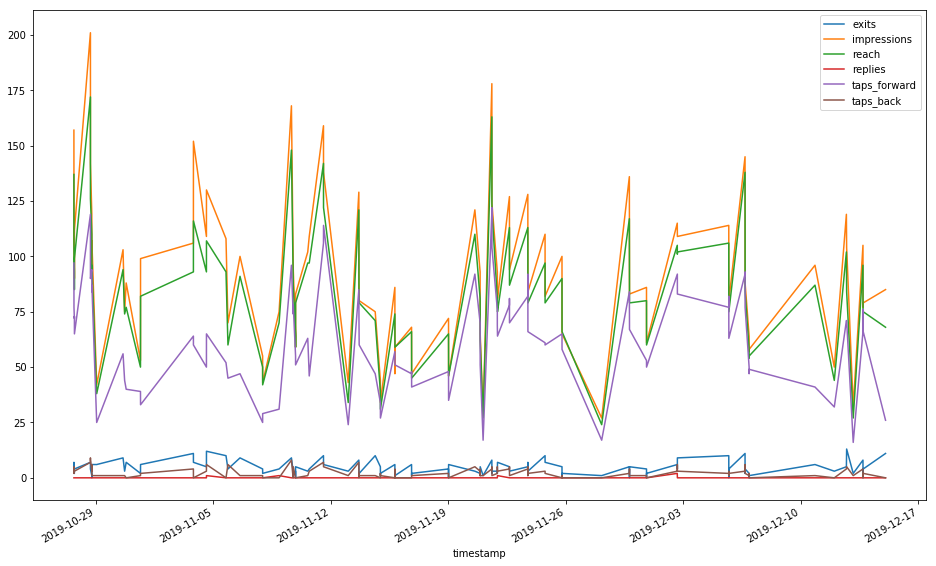

In [4]:
df.plot(figsize = (16,10))

In [ ]:
#hashtag_df = exploded[num_columns].groupby(['hashtags']).sum()

In [23]:
df.index.day_name()

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Monday', 'Monday',
       ...
       'Thursday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Sunday'],
      dtype='object', name='timestamp', length=159)

# By weekday

In [80]:


#df['weekday_num'] = df.index.weekday


In [82]:
weekdays

,exits,impressions,reach,replies,taps_forward,taps_back,hour,weekday_num
weekday,,,,,,,,
0-Mon,99,2564,2318,3,1868,84,361,0
1-Tue,39,648,595,0,417,15,59,10
2-Wed,79,1817,1694,0,1324,43,354,42
3-Thu,112,2563,2362,1,1948,62,476,87
4-Fri,107,3329,3148,1,2615,86,647,152
5-Sat,68,1922,1812,0,1489,40,444,120
6-Sun,81,1669,1487,0,1023,42,238,90


In [30]:
#Add a weekday column
df_hourly = df.set_index(df.index.to_period(freq = 'H')) #df.index.strftime('%w-%a')

In [41]:
df_hourly.index.strftime('%-a')

Index(['Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Mon', 'Mon',
       ...
       'Thu', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Sun'],
      dtype='object', length=159)

In [44]:
df_hourly.index.weekday

Int64Index([6, 6, 6, 6, 6, 6, 6, 6, 0, 0,
            ...
            3, 4, 4, 4, 4, 4, 4, 4, 4, 6],
           dtype='int64', name='timestamp', length=159)

In [36]:
#Now sum up data into weekdays
weekdays = df_hourly.groupby(['timestamp']).sum()

# FIX ALL THIS LATER

In [37]:
weekdays

,exits,impressions,reach,replies,taps_forward,taps_back
timestamp,,,,,,
2019-10-27 16:00,19,620,563,0,433,20
2019-10-27 17:00,9,303,277,0,210,9
2019-10-28 16:00,23,670,586,0,426,32
2019-10-28 18:00,13,637,591,0,536,17
2019-10-29 01:00,6,42,38,0,25,1
2019-10-30 14:00,9,103,94,0,56,1
2019-10-30 17:00,3,75,74,0,44,1
2019-10-30 19:00,7,88,77,0,40,0
2019-10-31 15:00,8,152,132,0,72,3


In [ ]:

weekdays['story_count'] = df['weekday'].value_counts()
#Divide each column by its number of stories to get the mean
weekday_means = pd.DataFrame({col: weekdays[col] / weekdays['story_count'] for col in cols})

In [89]:
weekday_means

,exits,impressions,reach,replies,taps_forward,taps_back
weekday,,,,,,
0-Sun,5.400000,111.266667,99.133333,0.000000,68.200000,2.800000
1-Mon,4.500000,116.545455,105.363636,0.136364,84.909091,3.818182
2-Tue,3.900000,64.800000,59.500000,0.000000,41.700000,1.500000
3-Wed,3.761905,86.523810,80.666667,0.000000,63.047619,2.047619
4-Thu,3.862069,88.379310,81.448276,0.034483,67.172414,2.137931
5-Fri,2.815789,87.605263,82.842105,0.026316,68.815789,2.263158
6-Sat,2.833333,80.083333,75.500000,0.000000,62.041667,1.666667


Text(0.5,1,'Average values by weekday')

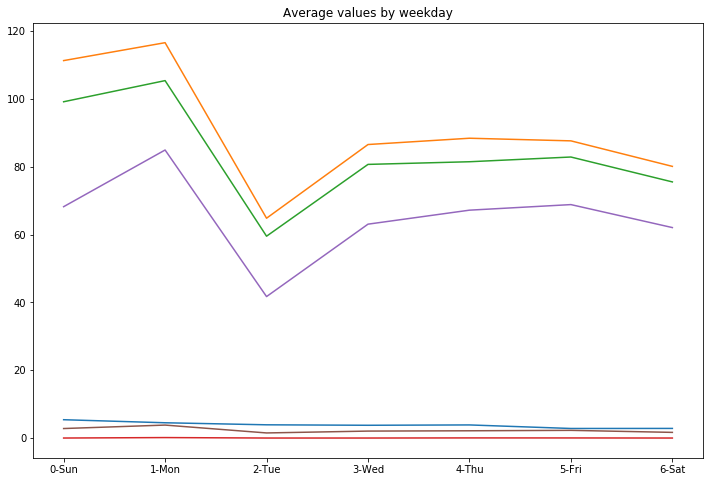

In [90]:
#weekday_means.plot(figsize = (12,8))
fig = plt.figure(figsize = (12,8))
plt.plot(weekday_means)
plt.xticks(weekday_means.index)
plt.title('Average values by weekday')

Text(0.5,1,'Average values by hour of the day')

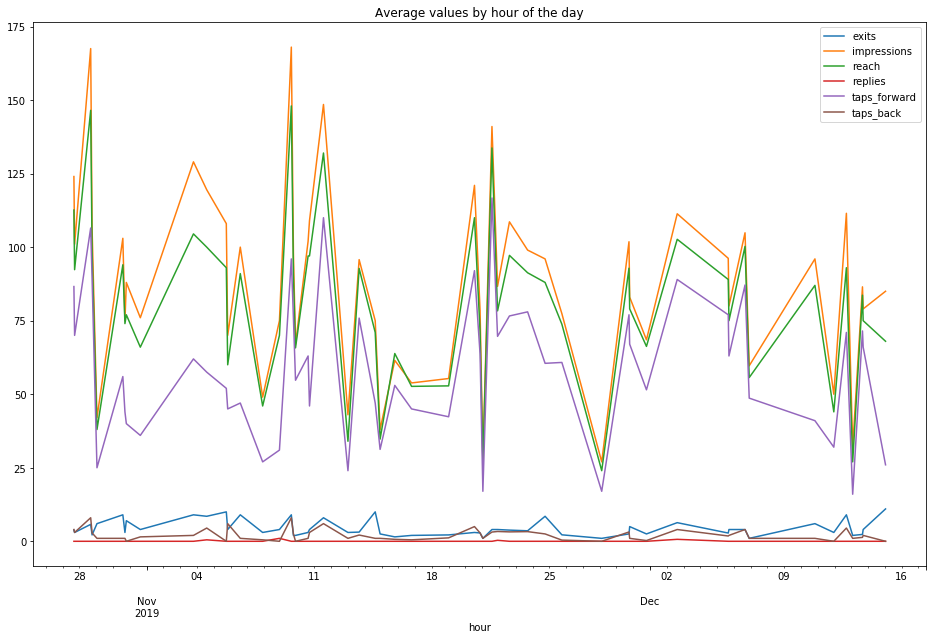

In [48]:
#Add an hours column
df['hour'] = df.index.to_period(freq = 'H') #df.index.strftime('%w-%a')
#Now sum up data into hour-days
hours = df.groupby(['hour']).sum()
hours['story_count'] = df['hour'].value_counts()
#Divide each column by its number of stories to get the mean
hour_means = pd.DataFrame({col: hours[col] / hours['story_count'] for col in cols})
hour_means.plot(figsize = (16,10))
plt.title('Average values by hour of the day')

In [55]:
hour_means.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 54 entries, 2019-10-27 16:00 to 2019-12-15 01:00
Freq: H
Data columns (total 6 columns):
exits           54 non-null float64
impressions     54 non-null float64
reach           54 non-null float64
replies         54 non-null float64
taps_forward    54 non-null float64
taps_back       54 non-null float64
dtypes: float64(6)
memory usage: 3.0 KB


In [61]:
hour_means

,exits,impressions,reach,replies,taps_forward,taps_back
hour,,,,,,
2019-10-27 16:00,3.800000,124.000000,112.600000,0.000000,86.600000,4.000000
2019-10-27 17:00,3.000000,101.000000,92.333333,0.000000,70.000000,3.000000
2019-10-28 16:00,5.750000,167.500000,146.500000,0.000000,106.500000,8.000000
2019-10-28 18:00,2.166667,106.166667,98.500000,0.000000,89.333333,2.833333
2019-10-29 01:00,6.000000,42.000000,38.000000,0.000000,25.000000,1.000000
2019-10-30 14:00,9.000000,103.000000,94.000000,0.000000,56.000000,1.000000
2019-10-30 17:00,3.000000,75.000000,74.000000,0.000000,44.000000,1.000000
2019-10-30 19:00,7.000000,88.000000,77.000000,0.000000,40.000000,0.000000
2019-10-31 15:00,4.000000,76.000000,66.000000,0.000000,36.000000,1.500000


In [ ]:
In [122]: df.B.plot(secondary_y=True, style='g')

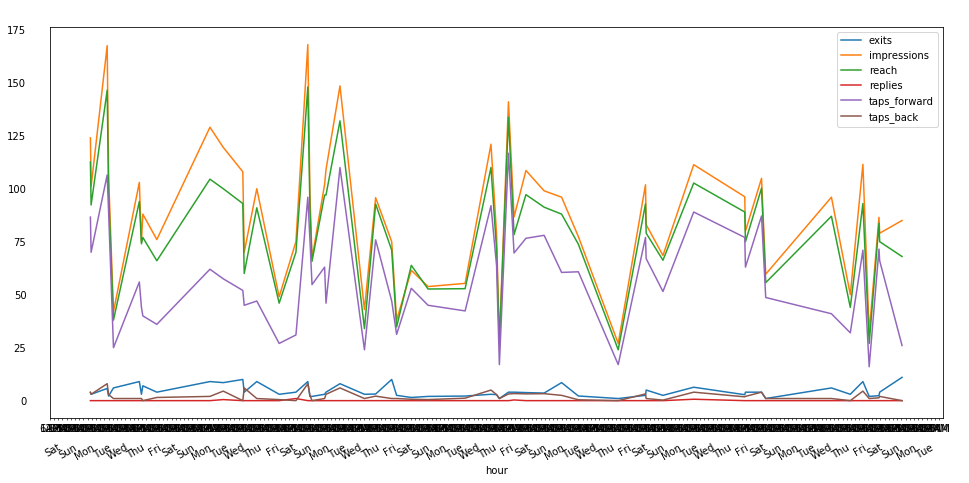

In [60]:
days = mdates.DayLocator()
d_fmt = mdates.DateFormatter('%a')
hours = mdates.HourLocator(interval = 6)
h_fmt = mdates.DateFormatter('%-I%p')

#fig, ax = plt.subplots(figsize = (16,8))
ax = hour_means.plot(figsize = (16, 8), x_compat = True)

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.xaxis.set_minor_locator(hours)
ax.xaxis.set_minor_formatter(h_fmt)
ax.tick_params(which='major', length= 20, color = 'white')
#plt.title('Average values by hour of the day')

# RESUME HERE. Resolve ticks. Check DH thing.

# strftime columns work but aren't clearest for labeling.

In [ ]:
    channel_labels = ['direct',  'organic_search', 'branded_search', 'social', 'email', 'subway']

    days = mdates.DayLocator()
    d_fmt = mdates.DateFormatter('%a')
    hours = mdates.HourLocator(interval = 6)
    h_fmt = mdates.DateFormatter('%-I%p')

    #Draw a plot to show hourly traffic
    fig, ax = plt.subplots(figsize = (16,8))
    ax.stackplot(hourlies.index, np.array([hourlies[column].values for column in channel_labels]),
                 labels = channel_labels)

    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(d_fmt)
    ax.xaxis.set_minor_locator(hours)
    ax.xaxis.set_minor_formatter(h_fmt)
    ax.tick_params(which='major', length= 20, color = 'white')
    plt.xlim('2019-04-01', '2019-04-08')
    plt.ylabel('traffic')
    plt.xlabel('hour of the day')
    plt.legend()
    plt.show()
